In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
x_train = x_train / 255
X_test = x_test / 255

In [40]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [41]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
    keras.layers.Flatten(),
    
    keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.0007),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

def scheduler(epoch, lr):
    return float(lr * tf.math.exp(-0.1))

learn_rate_scheduler = keras.callbacks.LearningRateScheduler(scheduler)
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)

model.fit(x_train, y_train, epochs=17, callbacks=[early_stop, learn_rate_scheduler])

Epoch 1/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9003 - loss: 0.4672 - learning_rate: 6.3339e-04
Epoch 2/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9669 - loss: 0.2354 - learning_rate: 5.7311e-04
Epoch 3/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9733 - loss: 0.1895 - learning_rate: 5.1857e-04
Epoch 4/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9766 - loss: 0.1668 - learning_rate: 4.6922e-04
Epoch 5/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9785 - loss: 0.1511 - learning_rate: 4.2457e-04
Epoch 6/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9811 - loss: 0.1361 - learning_rate: 3.8417e-04
Epoch 7/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9831 - loss: 0.1262 - learning_rate: 3.4761e-04
Epoch 8/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.1199 - learning_rate: 3.1453e-04
Epoch 9/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.984

In [44]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 3.0375


[3.037473678588867, 0.9926999807357788]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

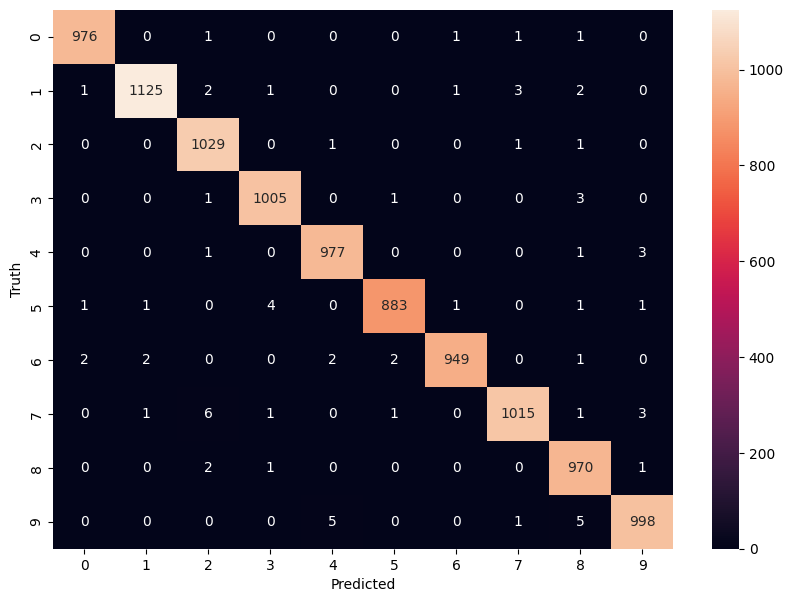

In [45]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')